In [1]:
%matplotlib inline

In [13]:
#export
from export.nb_01 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.pandas.set_option('display.max_columns', None)

In [56]:
#export
def files(path):
    return [f.name for f in os.scandir(path)]

Path.ls= files

In [34]:
path_tabdata=Path(r'D:\datasets\new_datasets')
path_tabdata.ls()

['caterpillar-tube-pricing',
 'costa-rican-household-poverty-prediction',
 'flavours-of-physics-kernels-only',
 'higgs-boson',
 'leaf-classification',
 'mercedes-benz-greener-manufacturing',
 'msk-redefining-cancer-treatment',
 'MusicHackathon',
 'nomad2018-predict-transparent-conductors',
 'porto-seguro-safe-driver-prediction',
 'predict-west-nile-virus',
 'predict-who-is-more-influential-in-a-social-network',
 'random-acts-of-pizza',
 'recruit-restaurant-visitor-forecasting',
 'sberbank-russian-housing-market',
 'spooky-author-identification',
 'whats-cooking']

In [35]:
path_house=path_tabdata/'sberbank-russian-housing-market'
path_house.ls()

['data_dictionary.txt',
 'macro.csv.zip',
 'New folder',
 'sample_submission.csv.zip',
 'test.csv',
 'train.csv',
 '__MACOSX']

In [36]:
path_house_train=path_house/'train.csv'
path_house_test=path_house/'test.csv'

In [37]:
df_train=pd.read_csv(path_house_train, index_col='id', parse_dates=['timestamp'], infer_datetime_format=True)
df_train.head()

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
id                                                                        
1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

    num_room  kitch_sq  state product_type           sub_area        area_m  \
id                                                                            
1        NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
2        NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
3        NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
4        NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
5        NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

    raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                  
1        155572         0.189727     0.000070                9576   
2        115352         0.372602     0.049637                6880   
3        101708         0.112560     0.118537                5879   
4        178473         0.194703     0.069753               13087   
5        108171         0.015234     0.037316                5706   

    preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                        
1            5001.0                                  5            10309   
2            3119.0                                  5             7759   
3            1463.0                                  4             6207   
4            6839.0                                  9            13670   
5            3240.0                                  7             6748   

    school_quota  school_education_centers_raion  \
id                                                 
1        11065.0                               5   
2         6237.0                               8   
3         5580.0                               7   
4        17063.0                              10   
5         7770.0                               9   

    school_education_centers_top_20_raion  hospital_beds_raion  \
id                                                               
1                                       0                240.0   
2                                       0                229.0   
3                                       0               1183.0   
4                                       0                  NaN   
5                                       0                562.0   

    healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
id                                                                           
1                          1                        0                    7   
2                          1                        0                    6   
3                          1                        0                    5   
4                          1                        0                   17   
5                          4                        2                   25   

    additional_education_raion culture_objects_top_25  \
id                                                      
1                            3                     no   
2                            1                    yes   
3                            1                     no   
4                            6                     no   
5                            2                     no   

    culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
id                                                               

In [38]:
#export
def add_datepart(df:pd.DataFrame, cols:list=None, just_date:bool=True,inplace:bool=True)->pd.DataFrame:
    '''parameters:
                df: pd.DataFrame
                cols: datetime cols
                just date: bool specifying whether the object is it just date or date time
                inplace: bool'''
    date_part=['year','month','day','week','dayofweek','weekday','quarter','is_month_start','is_month_end','is_year_end']
    time_part=['time','hour','minute','second']
    for i in cols:
        if not just_date:
            for j in time_part:
                df[f'{i}_{j}']=getattr(df[i].dt,j)
        for j in date_part:
            df[f'{i}_{j}']=getattr(df[i].dt,j)
    df.drop(columns=cols, inplace=True)
    return 

In [39]:
add_datepart(df_train, ['timestamp'])

In [40]:
discrete = [var for var in df_train.columns if df_train[var].dtype!='O' and var!='price_doc' and df_train[var].nunique()<10]
continuous = [var for var in df_train.columns if df_train[var].dtype!='O' and var!='price_doc' and var not in discrete]
categorical = [var for var in df_train.columns if df_train[var].dtype=='O']

In [41]:
len(discrete), len(continuous), len(categorical)

(29, 255, 15)

In [42]:
#export
def split_val(df:pd.DataFrame, val_pct:float=0.3):
    'returns `df_train` and `df_valid`'
    shuf_idx=np.random.permutation(len(df))
    train_idx, val_idx=shuf_idx[int(val_pct*len(df)):], shuf_idx[:int(val_pct*len(df))]
    return df.iloc[train_idx,:], df.iloc[val_idx,:]
    
def split_dep_col(df:pd.DataFrame, y:str):
    'returns `x` and `y`'
    return df.drop(columns=y), df.loc[:, y]
    
def split_test_val(df:pd.DataFrame, y:str, val_pct:float=0.3):
    ''' df 'pandas datadrame object `y` is the dependent column val_pct:=0.3'
    returns `x_train`, `y_train`, `x_valid`, `y_valid`'''
    df_train, df_val= split_val(df, val_pct)
    return split_dep_col(df_train, y), split_dep_col(df_val, y)

In [43]:
(x_train, y_train), (x_val, y_val)= split_test_val(df_train, y='price_doc')

In [44]:
#export
def check_missing(df:pd.DataFrame, top:int=10):
    return pd.DataFrame(df.isna().mean()).sort_values(by=0, ascending=False)[:top]

In [45]:
check_missing(x_train[continuous])

0
hospital_beds_raion         0.475059
build_year                  0.446648
cafe_sum_500_min_price_avg  0.437787
cafe_sum_500_max_price_avg  0.437787
cafe_avg_price_500          0.437787
max_floor                   0.313971
num_room                    0.313971
kitch_sq                    0.313971
preschool_quota             0.221097
school_quota                0.220956

In [46]:
x_cont_miss=check_missing(x_train[continuous])
cont_mis=list(x_cont_miss[x_cont_miss[0]>0].index)

In [47]:
check_missing(x_train[discrete])

0
state                     0.445195
material                  0.313971
build_count_foam          0.165401
build_count_mix           0.165401
mosque_count_1500         0.000000
timestamp_is_month_end    0.000000
timestamp_is_month_start  0.000000
timestamp_quarter         0.000000
timestamp_weekday         0.000000
timestamp_dayofweek       0.000000

In [48]:
discrete_mis=['state','material','build_count_foam','build_count_mix']

In [49]:
check_missing(x_train[categorical])

0
product_type               0.0
sub_area                   0.0
culture_objects_top_25     0.0
thermal_power_plant_raion  0.0
incineration_raion         0.0
oil_chemistry_raion        0.0
radiation_raion            0.0
railroad_terminal_raion    0.0
big_market_raion           0.0
nuclear_reactor_raion      0.0

In [50]:
x_train

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
id                                                                          
25083       58     43.0    3.0        9.0       1.0      1974.0       3.0   
14600       58     41.0    3.0        9.0       1.0      1975.0       3.0   
23454       39      NaN    8.0       19.0       1.0         NaN       1.0   
27761       55     32.0   14.0       16.0       1.0      1978.0       2.0   
16452       64     34.0   14.0       17.0       1.0      2004.0       2.0   
...        ...      ...    ...        ...       ...         ...       ...   
26423       85      NaN    4.0       22.0       1.0         0.0       3.0   
22855       51      NaN   10.0        1.0       1.0         NaN       1.0   
30138       62     42.0    6.0       12.0       1.0      1973.0       3.0   
25380       62      1.0    5.0       22.0       1.0      2016.0       2.0   
16013       51     30.0    8.0       17.0       1.0      2008.0       2.0   

       kitch_sq  state   product_type                  sub_area        area_m  \
id                                                                              
25083       6.0    NaN     Investment  Orehovo-Borisovo Juzhnoe  7.128794e+06   
14600       6.0    3.0     Investment                Ivanovskoe  1.020722e+07   
23454       1.0    NaN  OwnerOccupier      Poselenie Shherbinka  7.878765e+06   
27761       8.0    2.0     Investment                 Lianozovo  5.646405e+06   
16452      11.0    3.0     Investment           Severnoe Butovo  8.889467e+06   
...         ...    ...            ...                       ...           ...   
26423       1.0    1.0  OwnerOccupier      Poselenie Vnukovskoe  2.553630e+07   
22855       1.0    NaN  OwnerOccupier       Poselenie Sosenskoe  6.677245e+07   
30138       6.0    2.0     Investment              Jaroslavskoe  8.338438e+06   
25380       1.0    1.0  OwnerOccupier      Poselenie Shherbinka  7.878765e+06   
16013       9.0    NaN     Investment      Poselenie Moskovskij  4.036700e+07   

       raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                     
25083       145576         0.075790     0.100456                5594   
14600       122862         0.512707     0.000170                6027   
23454        32241         0.057070     0.211401                2041   
27761        79576         0.258663     0.101872                4857   
16452        90114         0.579645     0.000000                5102   
...            ...              ...          ...                 ...   
26423         4001         0.496315     0.007122                 275   
22855         9553         0.336177     0.072158                 656   
30138        94236         0.037754     0.127812                5991   
25380        32241         0.057070     0.211401                2041   
16013        21819         0.492840     0.075779                1497   

       preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                           
25083           4792.0                                  7             7227   
14600           2697.0                                  7             5992   
23454              NaN                                  0             1892   
27761           2703.0                                  5             4583   
16452           3617.0                                  6             4798   
...                ...                                ...              ...   
26423              NaN                                  0              264   
22855              NaN                                  0              629   
30138           2974.0                                  4             7287   
25380              NaN                                  0             1892   
16013              NaN                                  0             1437   


Text(0, 0.5, 'mean House price')

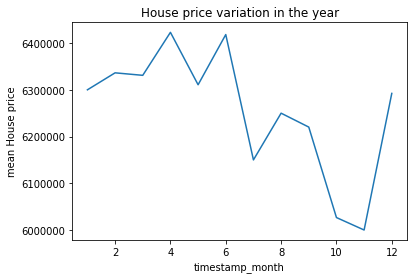

In [51]:
df_train.groupby('timestamp_month')['price_doc'].median().plot()
plt.title('House price variation in the year')
plt.ylabel('mean House price')

In [52]:
len(discrete), len(categorical)

(29, 15)

In [58]:
#export
class Tabular:
    def __init__(self, df_train:pd.DataFrame, df_val:pd.DataFrame , cat_cols:list=[], num_cols:list=[]):
        self.df_train=df_train.copy()
        self.df_val=df_val.copy()
        self.cat_cols=cat_cols
        self.num_cols=num_cols
        self.cat_col_dict={}
        self.rev_cat={}
        
    def conv_cat(self):
        for i in self.cat_cols:
            self.cat_col_dict[i]={k: j for j, k in enumerate(self.df_train[i].unique())}
            self.df_train[i].replace(self.cat_col_dict[i])
            self.df_val[i].replace(self.cat_col_dict[i])
            
    def impute_mean(self):
        self.mean_impute_dict={}
        for i in self.num_cols:
            self.mean_impute_dict[i]=self.df_train[i].mean()
            self.impute_na(self.df_train, i, self.mean_impute_dict[i])
            self.impute_na(self.df_val, i, self.mean_impute_dict[i])
            
    def impute_median(self):
        self.median_impute_dict={}
        for i in self.num_cols:
            self.median_impute_dict[i]=self.df_train[i].median()
            self.impute_na(self.df_train, i, self.median_impute_dict[i])
            self.impute_na(self.df_val, i, self.median_impute_dict[i])
            
    def impute_na(self, df:pd.DataFrame, col:str, value):
        df[col].fillna(value, inplace=True)
            
    def encode_disc(self):
        for i in self.dis_cols:
            df[i]=pd.qcut(df[i], 4)
    
    def ret_cat_codes(self):
        for i in self.cat_cols:
            self.df_train[i]=self.df_train[i].replace(self.cat_col_dict[i])
            self.impute_na(self.df_train, i, len(self.cat_col_dict[i])+1)
            self.df_val[i]=self.df_val[i].replace(self.cat_col_dict[i]) # dict(map(reversed, my_map.items()))
            self.impute_na(self.df_val, i, len(self.cat_col_dict[i])+1)

In [59]:
#export
def proc_df(df_tr:pd.DataFrame, df_va:pd.DataFrame, cat_cols:list, num_cols:list):
    data=Tabular(df_tr, df_va, cat_cols=cat_cols, num_cols=num_cols)
    data.impute_mean()
    data.conv_cat()
    data.ret_cat_codes()
    return data

In [60]:
data=proc_df(x_train, x_val, cat_cols=categorical+discrete, num_cols=continuous)

In [61]:
x_train

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
id                                                                          
25083       58     43.0    3.0        9.0       1.0      1974.0       3.0   
14600       58     41.0    3.0        9.0       1.0      1975.0       3.0   
23454       39      NaN    8.0       19.0       1.0         NaN       1.0   
27761       55     32.0   14.0       16.0       1.0      1978.0       2.0   
16452       64     34.0   14.0       17.0       1.0      2004.0       2.0   
...        ...      ...    ...        ...       ...         ...       ...   
26423       85      NaN    4.0       22.0       1.0         0.0       3.0   
22855       51      NaN   10.0        1.0       1.0         NaN       1.0   
30138       62     42.0    6.0       12.0       1.0      1973.0       3.0   
25380       62      1.0    5.0       22.0       1.0      2016.0       2.0   
16013       51     30.0    8.0       17.0       1.0      2008.0       2.0   

       kitch_sq  state   product_type                  sub_area        area_m  \
id                                                                              
25083       6.0    NaN     Investment  Orehovo-Borisovo Juzhnoe  7.128794e+06   
14600       6.0    3.0     Investment                Ivanovskoe  1.020722e+07   
23454       1.0    NaN  OwnerOccupier      Poselenie Shherbinka  7.878765e+06   
27761       8.0    2.0     Investment                 Lianozovo  5.646405e+06   
16452      11.0    3.0     Investment           Severnoe Butovo  8.889467e+06   
...         ...    ...            ...                       ...           ...   
26423       1.0    1.0  OwnerOccupier      Poselenie Vnukovskoe  2.553630e+07   
22855       1.0    NaN  OwnerOccupier       Poselenie Sosenskoe  6.677245e+07   
30138       6.0    2.0     Investment              Jaroslavskoe  8.338438e+06   
25380       1.0    1.0  OwnerOccupier      Poselenie Shherbinka  7.878765e+06   
16013       9.0    NaN     Investment      Poselenie Moskovskij  4.036700e+07   

       raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                     
25083       145576         0.075790     0.100456                5594   
14600       122862         0.512707     0.000170                6027   
23454        32241         0.057070     0.211401                2041   
27761        79576         0.258663     0.101872                4857   
16452        90114         0.579645     0.000000                5102   
...            ...              ...          ...                 ...   
26423         4001         0.496315     0.007122                 275   
22855         9553         0.336177     0.072158                 656   
30138        94236         0.037754     0.127812                5991   
25380        32241         0.057070     0.211401                2041   
16013        21819         0.492840     0.075779                1497   

       preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                           
25083           4792.0                                  7             7227   
14600           2697.0                                  7             5992   
23454              NaN                                  0             1892   
27761           2703.0                                  5             4583   
16452           3617.0                                  6             4798   
...                ...                                ...              ...   
26423              NaN                                  0              264   
22855              NaN                                  0              629   
30138           2974.0                                  4             7287   
25380              NaN                                  0             1892   
16013              NaN                                  0             1437   


In [62]:
data.df_train

full_sq    life_sq  floor  max_floor  material   build_year  num_room  \
id                                                                             
25083       58  43.000000    3.0        9.0       0.0  1974.000000       3.0   
14600       58  41.000000    3.0        9.0       0.0  1975.000000       3.0   
23454       39  34.453282    8.0       19.0       0.0  1876.625688       1.0   
27761       55  32.000000   14.0       16.0       0.0  1978.000000       2.0   
16452       64  34.000000   14.0       17.0       0.0  2004.000000       2.0   
...        ...        ...    ...        ...       ...          ...       ...   
26423       85  34.453282    4.0       22.0       0.0     0.000000       3.0   
22855       51  34.453282   10.0        1.0       0.0  1876.625688       1.0   
30138       62  42.000000    6.0       12.0       0.0  1973.000000       3.0   
25380       62   1.000000    5.0       22.0       0.0  2016.000000       2.0   
16013       51  30.000000    8.0       17.0       0.0  2008.000000       2.0   

       kitch_sq  state  product_type  sub_area        area_m  raion_popul  \
id                                                                          
25083       6.0    0.0             0         0  7.128794e+06       145576   
14600       6.0    1.0             0         1  1.020722e+07       122862   
23454       1.0    0.0             1         2  7.878765e+06        32241   
27761       8.0    2.0             0         3  5.646405e+06        79576   
16452      11.0    1.0             0         4  8.889467e+06        90114   
...         ...    ...           ...       ...           ...          ...   
26423       1.0    3.0             1        27  2.553630e+07         4001   
22855       1.0    0.0             1        14  6.677245e+07         9553   
30138       6.0    2.0             0        82  8.338438e+06        94236   
25380       1.0    3.0             1         2  7.878765e+06        32241   
16013       9.0    0.0             0        28  4.036700e+07        21819   

       green_zone_part  indust_part  children_preschool  preschool_quota  \
id                                                                         
25083         0.075790     0.100456                5594      4792.000000   
14600         0.512707     0.000170                6027      2697.000000   
23454         0.057070     0.211401                2041      3268.181473   
27761         0.258663     0.101872                4857      2703.000000   
16452         0.579645     0.000000                5102      3617.000000   
...                ...          ...                 ...              ...   
26423         0.496315     0.007122                 275      3268.181473   
22855         0.336177     0.072158                 656      3268.181473   
30138         0.037754     0.127812                5991      2974.000000   
25380         0.057070     0.211401                2041      3268.181473   
16013         0.492840     0.075779                1497      3268.181473   

       preschool_education_centers_raion  children_school  school_quota  \
id                                                                        
25083                                  7             7227  11178.000000   
14600                                  7             5992   9439.000000   
23454                                  0             1892   8316.401817   
27761                                  5             4583   7236.000000   
16452                                  6             4798   7653.000000   
...                                  ...              ...           ...   
26423                                  0              264   8316.401817   
22855                                  0              629   8316.401817   
30138                                  4             7287   6119.000000   
25380                                  0             1892   8316.401817   
16013                                  0             1437   8316.401817   


In [64]:
def norm_max_min(df_train, df_val):
    res_train, res_val = df_train.copy(), df_val.copy()
    for feature_name in df_train.columns:
        max_value = df_train[feature_name].max()
        min_value = df_train[feature_name].min()
        res_train[feature_name] = (df_train[feature_name] - min_value) / (max_value - min_value)
        res_val[feature_name]= (df_val[feature_name]-min_value/ (max_value-min_value))
    return res_train, res_val

In [70]:
#export
def normalize(df_train, df_val):
    res_train, res_val= df_train.copy(), data.df_val.copy()
    for feature_name in res_train.columns:
        mean_train=res_train[feature_name].mean()
        std_train=res_train[feature_name].std
        res_train[feature_name]=(res_train[feature_name]-mean_train)/std_train
        res_val[feature_name]=(res_val[feature_name]-mean_train)/std_train
    return res_train, res_val

In [71]:
normalize(x_train, x_val)

TypeError: <class 'method'>

In [66]:
preds=clf.predict(X_val)

NameError: name 'clf' is not defined

In [67]:
r2_score(y_val, preds)

NameError: name 'r2_score' is not defined

In [68]:
y_val[:10], preds[:10]

NameError: name 'preds' is not defined

In [69]:
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'sklearn'

In [299]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, y_train)
preds=regr.predict(X_val)
r2_score(y_val, preds)

-26.1997974514665

In [300]:
y_val[:10], preds[:10]

(id
 7726     12640380
 14920    20500000
 18669    14000000
 22009     7000000
 29603     1000000
 25546     4641000
 23814     5756303
 9332      6500000
 13947     5400000
 3653      5500000
 Name: price_doc, dtype: int64,
 array([33595172.90340298, 33595172.90340298, 33595172.90340298,
        32955842.97149104, 31824090.21802514, 28483994.76756088,
        11264449.11355723, 33595172.90340298, 32838501.25733667,
        31824090.21802514]))

In [57]:
preds.std(), y_val.std()

NameError: name 'preds' is not defined